In [1]:
# Hidden Markov Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [3]:
states = ['sleeping', 'eating', 'walking']
pi = [0.45, 0.35, 0.2]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

sleeping    0.45
eating      0.35
walking     0.20
Name: states, dtype: float64
1.0


In [4]:
state_space['eating']

0.35

In [5]:
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.40, 0.40, 0.2]
q_df.loc[states[2]] = [0.40, 0.20, .4]

In [6]:
q_df

,sleeping,eating,walking
sleeping,0.4,0.2,0.4
eating,0.4,0.4,0.2
walking,0.4,0.2,0.4


In [7]:
q_f = q_df.values
print('\n', q_f, q_f.shape, '\n')
print(q_df.sum(axis=1))


 [[0.4 0.2 0.4]
 [0.4 0.4 0.2]
 [0.4 0.2 0.4]] (3, 3) 

sleeping    1.0
eating      1.0
walking     1.0
dtype: float64


In [8]:
from pprint import pprint 

In [9]:
def _get_markov_edges(Q):
    edge = {}
    for column in Q.columns:
        for index in Q.index:
            edge[(index,column)] = Q.loc[index,column]
    return edge

edge_wt = _get_markov_edges(q_df)
pprint(edge_wt)

{('eating', 'eating'): 0.4,
 ('eating', 'sleeping'): 0.4,
 ('eating', 'walking'): 0.2,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'sleeping'): 0.4,
 ('sleeping', 'walking'): 0.4,
 ('walking', 'eating'): 0.2,
 ('walking', 'sleeping'): 0.4,
 ('walking', 'walking'): 0.4}


In [13]:
d = {6:67,7:12,9:47}
d.items()

dict_items([(6, 67), (7, 12), (9, 47)])

In [10]:
# Create the graph object
Graph = nx.MultiDiGraph()

In [11]:
# Add the states to the graph
Graph.add_nodes_from(states)
print(f'Nodes:\n{Graph.nodes()}\n')

Nodes:
['sleeping', 'eating', 'walking']



In [12]:
for k, v in edge_wt.items():
    tmp_origin, tmp_destination = k[0], k[1]
    Graph.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(Graph.edges(data=True))    

Edges:
OutMultiEdgeDataView([('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'walking', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('eating', 'eating', {'weight': 0.4, 'label': 0.4}), ('eating', 'walking', {'weight': 0.2, 'label': 0.2}), ('walking', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('walking', 'eating', {'weight': 0.2, 'label': 0.2}), ('walking', 'walking', {'weight': 0.4, 'label': 0.4})])


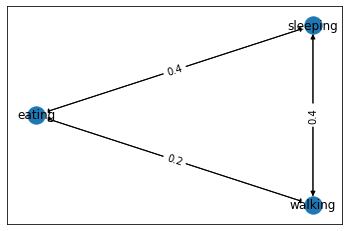

In [15]:
position = nx.drawing.nx_pydot.graphviz_layout(Graph, prog='dot')
nx.draw_networkx(Graph, position)

edge_labels = {(n1,n2):d['label'] for n1,n2,d in Graph.edges(data=True)}
nx.draw_networkx_edge_labels(Graph , position, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(Graph, 'my_markov.dot')

In [16]:
hidden_state = ['healthy', 'sick']
pi = [0.55, 0.45]
state_space = pd.Series(pi, index=hidden_state, name='states')
print(state_space)
print('\n', state_space.sum())

healthy    0.55
sick       0.45
Name: states, dtype: float64

 1.0


In [17]:
a1_df = pd.DataFrame(columns=hidden_state, index=hidden_state)
a1_df.loc[hidden_state[0]] = [0.7, 0.3]
a1_df.loc[hidden_state[1]] = [0.4, 0.6]

In [18]:
a1_df

,healthy,sick
healthy,0.7,0.3
sick,0.4,0.6


In [19]:
import numpy as np

In [20]:
x = [5,6,7,8,9]
y = np.array([5,6,7,8,9])

In [21]:
x

[5, 6, 7, 8, 9]

In [22]:
y

array([5, 6, 7, 8, 9])

In [23]:
z = x*2

In [24]:
z

[5, 6, 7, 8, 9, 5, 6, 7, 8, 9]

In [25]:
y * 2

array([10, 12, 14, 16, 18])

In [26]:
y + 4

array([ 9, 10, 11, 12, 13])

In [27]:
np.dot(y,y)

255